<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Machine Learning for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 3: Machine learning\
Last Updated: January 11, 2021\
Author: Raka Ardhi

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load your dataset here
df=pd.read_csv('./bank-additional.csv',sep=';')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(4119, 21)

Let's view Dtype of each features in dataframe using `.info()` function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [7]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


transform label into categorial numeric of targetted column

In [27]:
from sklearn.preprocessing import LabelEncoder
mentah = df['y'].values
print('data y before:',mentah)

udah = LabelEncoder().fit_transform(mentah)
print('data y before:',udah)

data y before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data y before: [0 0 0 ... 0 0 0]


In [9]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


## Exploratory data analysis

# Feature selection 
* Industrial knowledge
* Correlation
* Data distribution
* Variable relationship

In [16]:
list_of_features = ['age','job','marital','education','housing','loan']

#Numeric
df[list_of_features].describe()

,age
count,4119.000000
mean,40.113620
std,10.313362
min,18.000000
25%,32.000000
50%,38.000000
75%,47.000000
max,88.000000


From age's information, it can be known:
* the variance is not that much
* the age mean is 40 years old
* the range is bit wider, means taht the max can be said outlier (88 years old)

In [17]:
#Non-numeric
for x in list_of_features:
    print(df[x].value_counts(),'\n')

32    216
31    191
30    177
34    174
35    172
     ... 
82      2
86      2
88      1
19      1
85      1
Name: age, Length: 67, dtype: int64 

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64 

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64 

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64 

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64 

no         3349
yes         665
unknown     105
Name: loan, dtype: int64 



In [13]:
(df['education']!='illiterate')

0       True
1       True
2       True
3       True
4       True
        ... 
4114    True
4115    True
4116    True
4117    True
4118    True
Name: education, Length: 4119, dtype: bool

In [19]:
df[(df['education']!='illiterate')][list_of_features].head()

,age,job,marital,education,housing,loan
0,30,blue-collar,married,basic.9y,yes,no
1,39,services,single,high.school,no,no
2,25,services,married,high.school,yes,no
3,38,services,married,basic.9y,unknown,unknown
4,47,admin.,married,university.degree,yes,no


In [20]:
#See the correlation for model feature
job_target_group = df.groupby(by=['job','y'])['job'].count()
job_target_group

job            y  
admin.         no     879
               yes    133
blue-collar    no     823
               yes     61
entrepreneur   no     140
               yes      8
housemaid      no      99
               yes     11
management     no     294
               yes     30
retired        no     128
               yes     38
self-employed  no     146
               yes     13
services       no     358
               yes     35
student        no      63
               yes     19
technician     no     611
               yes     80
unemployed     no      92
               yes     19
unknown        no      35
               yes      4
Name: job, dtype: int64

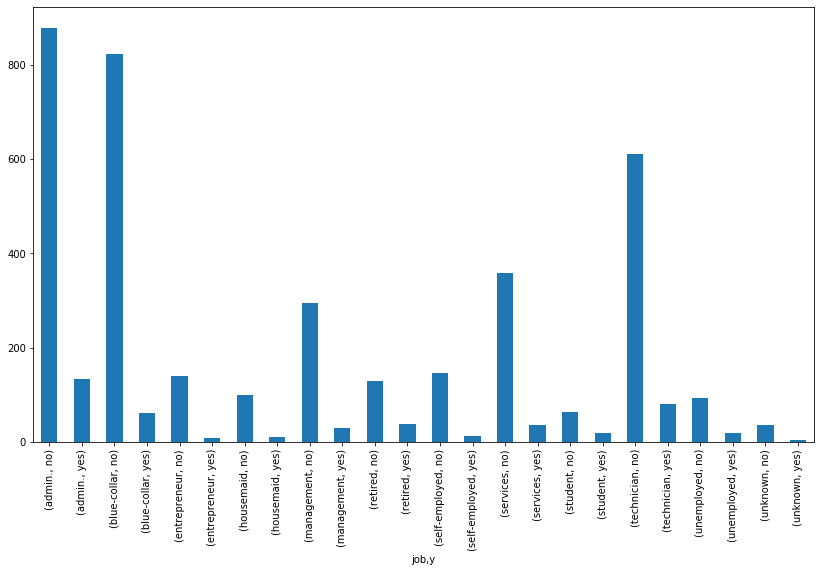

In [21]:
job_target_group.plot(kind='bar',figsize=(14,8))
plt.show()

In [22]:
df['y_after']=udah
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_after
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [118]:
udah = udah.reshape(-1,1)
udah.shape

(4119, 1)

In [24]:
u = np.array(df['age']).reshape(-1,1)
u.shape

(4119, 1)

#EDA per column feature - 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'


In [32]:
#Describe

hmm = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

#Numeric
df[hmm].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,1.563114,0.579349,4.594578,1.733591,73.667904
min,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
for x in hmm:
    print(df[x].value_counts(),'\n')

 1.4    1626
-1.8     883
 1.1     758
-0.1     392
-2.9     164
-3.4     104
-1.7      87
-1.1      83
-3.0      21
-0.2       1
Name: emp.var.rate, dtype: int64 

93.994    758
93.918    667
92.893    597
93.444    528
94.465    431
93.200    386
93.075    201
92.201     75
92.963     75
92.431     43
94.199     39
92.649     36
94.027     33
94.215     30
92.379     25
92.843     25
94.767     24
94.055     24
93.876     23
93.369     23
92.713     21
94.601     20
93.749     14
92.469     14
93.798      6
92.756      1
Name: cons.price.idx, dtype: int64 

-36.4    758
-42.7    667
-46.2    597
-36.1    528
-41.8    431
-42.0    386
-47.1    201
-31.4     75
-40.8     75
-26.9     43
-37.5     39
-30.1     36
-38.3     33
-40.3     30
-50.0     25
-29.8     25
-50.8     24
-39.8     24
-34.8     23
-40.0     23
-33.0     21
-49.5     20
-33.6     14
-34.6     14
-40.4      6
-45.9      1
Name: cons.conf.idx, dtype: int64 

4.857    274
4.963    256
4.962    237
4.961    212
4.856   

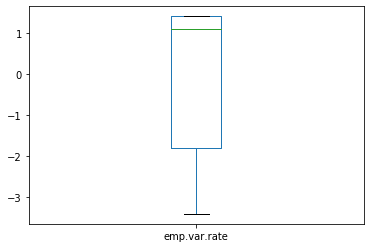

In [43]:
df['emp.var.rate'].plot(kind='box')

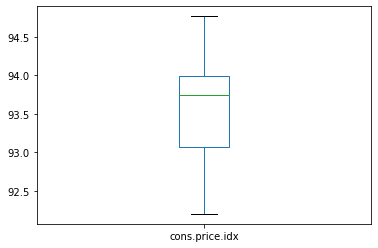

In [44]:
df['cons.price.idx'].plot(kind='box')

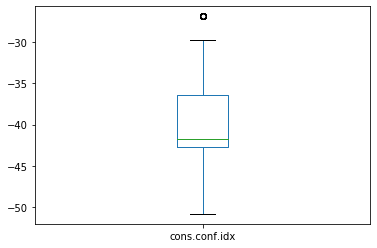

In [45]:
df['cons.conf.idx'].plot(kind='box')

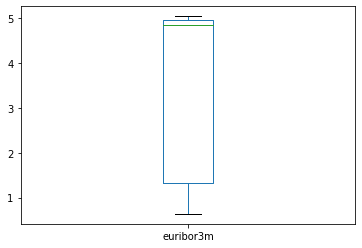

In [46]:
df['euribor3m'].plot(kind='box')

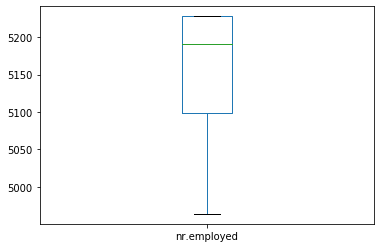

In [47]:
df['nr.employed'].plot(kind='box')

In [48]:
number_of_emp = df.groupby(by=['nr.employed','y'])['nr.employed'].count()
number_of_emp

nr.employed  y  
4963.6       no       48
             yes      35
4991.6       no       42
             yes      45
5008.7       no       22
             yes      38
5017.5       no       65
             yes      39
5023.5       no        9
             yes      12
5076.2       no      107
             yes      57
5099.1       no      732
             yes      91
5176.3       no        1
5191.0       no      733
             yes      25
5195.8       no      372
             yes      20
5228.1       no     1537
             yes      89
Name: nr.employed, dtype: int64

# Machine Learning

## KNN Algorithm

In [144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

le = LabelEncoder()

#Converting string labels to numbers
job_encoded = le.fit_transform(df['job'])
marital_encoded = le.fit_transform(df['marital'])
ed_encoded = le.fit_transform(df['education'])
housing_encoded = le.fit_transform(df['housing'])
loan_encoded = le.fit_transform(df['loan'])
j = np.array(job_encoded).reshape(-1,1)
m = np.array(marital_encoded).reshape(-1,1)
e = np.array(ed_encoded).reshape(-1,1)
h = np.array(housing_encoded).reshape(-1,1)
l = np.array(loan_encoded).reshape(-1,1)
np.shape(h)


(4119, 1)

In [145]:
#Combining columns into features
features = np.concatenate((u,j,m,e,h,l), axis=1)
features.shape

(4119, 6)

In [64]:
#Split dataset into training set and data set

x_train, x_test, y_train, y_test = train_test_split(features,udah,test_size=0.25) #80% training and 20% test

mod_KNN = KNeighborsClassifier(n_neighbors=5)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)

In [65]:
#See accuracy
from sklearn import metrics
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8961165048543689


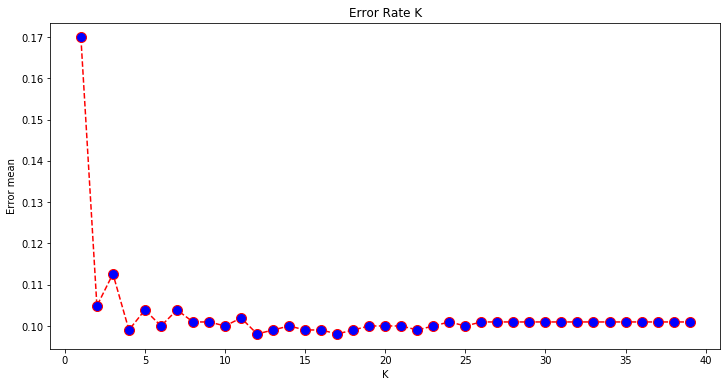

In [66]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN = KNeighborsClassifier(n_neighbors=i)
    mod_KNN.fit(x_train,y_train)
    y_pred_KNN_i = mod_KNN.predict(x_test)
    error.append(np.mean(y_pred_KNN_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [95]:
#Best model with optimum K =22
mod_KNN = KNeighborsClassifier(n_neighbors=17)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.9019417475728155


In [96]:
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_KNN

array([[924,   2],
       [ 99,   5]])

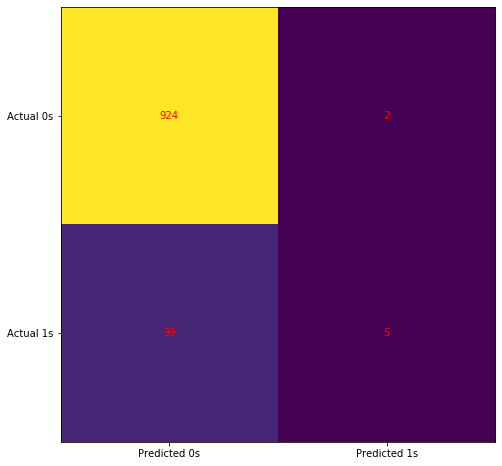

In [97]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_KNN)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_KNN[i,j], ha='center', va='center', color = 'red')
plt.show()

## Logistic Regression

In [110]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler #ini hanya untuk continous
from sklearn.preprocessing import OneHotEncoder

#Normalization
print ('x_train_before:',x_train)
scaler = StandardScaler()
#HOT = OneHotEncoder()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

print ('x_train_after:',X_train)
print ('x_test_before:',x_test)
print ('x_test_after:',X_test)

x_train_before: [[32  9  2  5  2  0]
 [35  0  1  3  2  0]
 [37  0  1  3  2  0]
 ...
 [25  6  2  6  0  0]
 [39  9  1  5  2  0]
 [31  3  1  0  0  0]]
x_train_after: [[-0.7875274   1.42377837  1.34640164  0.55613007  0.95430193 -0.46484431]
 [-0.49353705 -1.06365093 -0.30139339 -0.37145404  0.95430193 -0.46484431]
 [-0.29754348 -1.06365093 -0.30139339 -0.37145404  0.95430193 -0.46484431]
 ...
 [-1.47350487  0.59463527  1.34640164  1.01992212 -1.07728915 -0.46484431]
 [-0.10154992  1.42377837 -0.30139339  0.55613007  0.95430193 -0.46484431]
 [-0.88552418 -0.23450783 -0.30139339 -1.76283021 -1.07728915 -0.46484431]]
x_test_before: [[32  7  1  3  0  0]
 [32  9  2  6  0  0]
 [52  5  1  0  1  1]
 ...
 [53  7  1  3  2  0]
 [29  9  2  6  2  2]
 [33  7  2  3  2  0]]
x_test_after: [[-0.78545896  0.9097085  -0.26357024 -0.33768416 -1.16906483 -0.48462576]
 [-0.78545896  1.47028268  1.39177941  1.07237538 -1.16906483 -0.48462576]
 [ 1.09686475  0.34913431 -0.26357024 -1.74774371 -0.14774441  0.82551

In [130]:
mod_log = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [132]:
y_pred_log = mod_log.predict(x_test)

In [133]:
mod_log.score(x_train,y_train)

0.8876659112981548

In [134]:
mod_log.score(x_test,y_test)

0.8990291262135922

In [135]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[926,   0],
       [104,   0]])

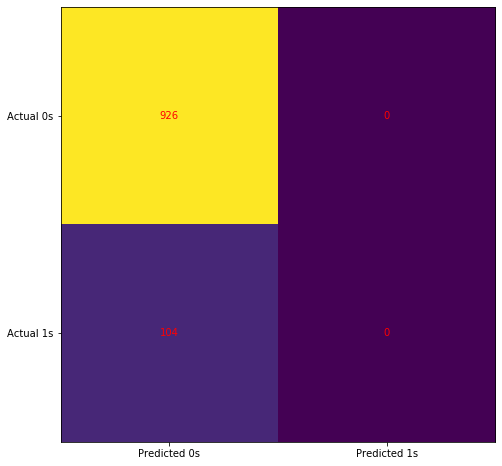

In [141]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_log)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_log[i,j], ha='center', va='center', color = 'red')
plt.show()

In [75]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       926
           1       0.00      0.00      0.00       104

    accuracy                           0.90      1030
   macro avg       0.45      0.50      0.47      1030
weighted avg       0.81      0.90      0.85      1030



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes 

In [120]:
from sklearn.naive_bayes import GaussianNB

mod_bay = GaussianNB().fit(x_train,y_train)
mod_bay

GaussianNB()

In [136]:
y_pred_bay = mod_bay.predict(x_test)

In [137]:
mod_bay.score(x_train,y_train)

0.8883133700226611

In [138]:
mod_bay.score(x_test,y_test)

0.9

In [139]:
cm_bay = confusion_matrix(y_test,y_pred_bay)
cm_bay

array([[921,   5],
       [ 98,   6]])

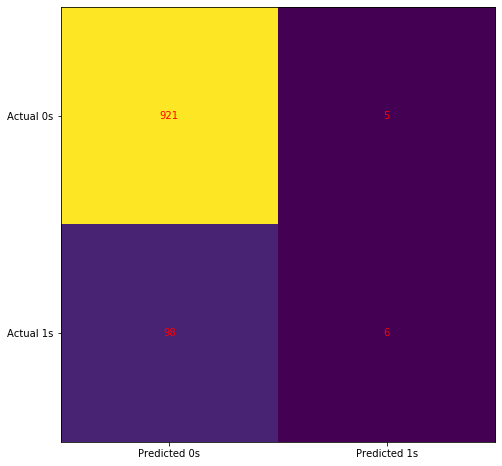

In [140]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_bay)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_bay[i,j], ha='center', va='center', color = 'red')
plt.show()

# Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
mod_clf = clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)

In [147]:
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))

Accuracy Decision Tree: 0.8262135922330097


In [148]:
cm_clf = confusion_matrix(y_test,y_pred_clf)
cm_clf

array([[837,  89],
       [ 90,  14]])

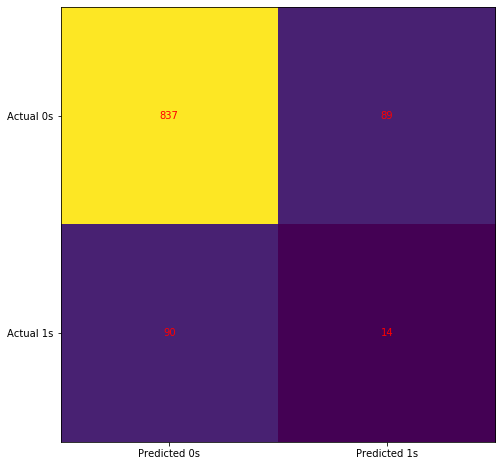

In [149]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_clf)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_clf[i,j], ha='center', va='center', color = 'red')
plt.show()

# Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(n_estimators=100)
mod_rfs = rfs.fit(x_train,y_train)
y_pred_rfs = rfs.predict(x_test)

In [153]:
print("Accuracy Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))

Accuracy Random Forest: 0.874757281553398


In [154]:
cm_rfs = confusion_matrix(y_test,y_pred_rfs)
cm_rfs

array([[889,  37],
       [ 92,  12]])

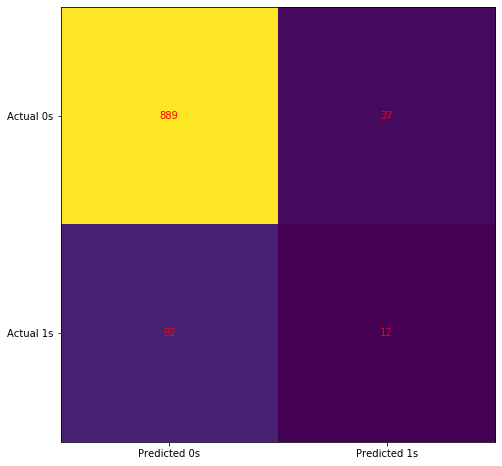

In [155]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_rfs)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_rfs[i,j], ha='center', va='center', color = 'red')
plt.show()

# SVM

In [156]:
from sklearn import svm

sup = svm.SVC(kernel='linear')
mod_sup = sup.fit(x_train,y_train)
y_pred_sup = sup.predict(x_test)

In [157]:
print("Accuracy SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy SVM: 0.8990291262135922


In [158]:
cm_sup = confusion_matrix(y_test,y_pred_sup)
cm_sup

array([[926,   0],
       [104,   0]])

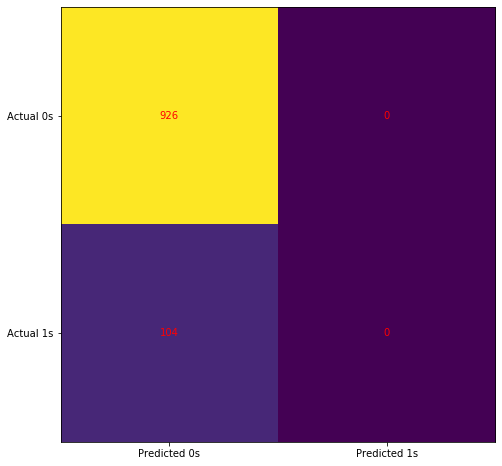

In [159]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_sup)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_sup[i,j], ha='center', va='center', color = 'red')
plt.show()

# Summary

To predict whether someone will open bank account based on 6 features of age, job, education, marital, housing, and loan, we can use several algorithms of machine learning. Here, I try to build some models to solve the case using composition of 75% data training and 25% data test. Here are the result of model performance based on data test.

In [162]:
print("Accuracy model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))
print("Accuracy model Logistic Regression:",metrics.accuracy_score(y_test,y_pred_log))
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test,y_pred_bay))
print("Accuracy model Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))
print("Accuracy model Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))
print("Accuracy model SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy model KNN: 0.9019417475728155
Accuracy model Logistic Regression: 0.8990291262135922
Accuracy model Naive Bayes: 0.9
Accuracy model Decision Tree: 0.8262135922330097
Accuracy model Random Forest: 0.874757281553398
Accuracy model SVM: 0.8990291262135922
